<a href="https://colab.research.google.com/github/merma1509/ClimateInsights/blob/main/Climate_Change_Earth_Surface_Temperature_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading and Importing needed libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from string import ascii_uppercase
from random import randrange

%matplotlib inline

In [ ]:
gl_temp_df = pd.read_csv('GlobalTemperatures.csv')
gl_temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


Trying to inspect our data and then see the summary and basics informations

In [ ]:
gl_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [ ]:
# Rename and change the data types of our dt column
gl_temp_df['dt'] = pd.to_datetime(gl_temp_df['dt'])
gl_temp_df = gl_temp_df.rename(columns={'dt': 'Date'})

In [ ]:
gl_temp_df.describe()

,Date,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3192,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,1882-12-15 23:02:15.338345984,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
min,1750-01-01 00:00:00,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,1816-06-23 12:00:00,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,1882-12-16 12:00:00,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,1949-06-08 12:00:00,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,2015-12-01 00:00:00,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000
std,NaN,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587


In [ ]:
# Function to make the columns in our datasets easily readable
from string import ascii_uppercase
def renaming_columns(df_cols):
  df_col = []
  for col in df_cols:
    for letter in col:
      if letter in ascii_uppercase and col.index(letter) != 0: # Look only for the uppercase letters but not on the beginning of the word
        col = col.replace(letter, f' {letter}')
    df_col.append(col)
  return df_col
gl_temp_df.columns = renaming_columns(gl_temp_df.columns)
gl_temp_df.head()

,Date,Land Average Temperature,Land Average Temperature Uncertainty,Land Max Temperature,Land Max Temperature Uncertainty,Land Min Temperature,Land Min Temperature Uncertainty,Land And Ocean Average Temperature,Land And Ocean Average Temperature Uncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gl_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              3192 non-null   datetime64[ns]
 1   Land Average Temperature                          3180 non-null   float64       
 2   Land Average Temperature Uncertainty              3180 non-null   float64       
 3   Land Max Temperature                              1992 non-null   float64       
 4   Land Max Temperature Uncertainty                  1992 non-null   float64       
 5   Land Min Temperature                              1992 non-null   float64       
 6   Land Min Temperature Uncertainty                  1992 non-null   float64       
 7   Land  And Ocean  Average Temperature              1992 non-null   float64       
 8   Land  And Ocean  Average Temp

In [ ]:
# Trying to find the missing values (how much are they) and thir corresponding columns
gl_temp_df.isnull().sum()

Date                                                   0
Land Average Temperature                              12
Land Average Temperature Uncertainty                  12
Land Max Temperature                                1200
Land Max Temperature Uncertainty                    1200
Land Min Temperature                                1200
Land Min Temperature Uncertainty                    1200
Land  And Ocean  Average Temperature                1200
Land  And Ocean  Average Temperature Uncertainty    1200
dtype: int64

In [ ]:
cols_with_missing_values = gl_temp_df.columns[gl_temp_df.isnull().any()]
cols_with_missing_values

Index(['Land Average Temperature', 'Land Average Temperature Uncertainty',
       'Land Max Temperature', 'Land Max Temperature Uncertainty',
       'Land Min Temperature', 'Land Min Temperature Uncertainty',
       'Land  And Ocean  Average Temperature',
       'Land  And Ocean  Average Temperature Uncertainty'],
      dtype='object')

In [ ]:
# We're filling in the missing values with the average value of the columns
gl_temp_df[cols_with_missing_values] = gl_temp_df[cols_with_missing_values].fillna(gl_temp_df[cols_with_missing_values].mean())
gl_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   dt                                                3192 non-null   object 
 1   Land Average Temperature                          3192 non-null   float64
 2   Land Average Temperature Uncertainty              3192 non-null   float64
 3   Land Max Temperature                              3192 non-null   float64
 4   Land Max Temperature Uncertainty                  3192 non-null   float64
 5   Land Min Temperature                              3192 non-null   float64
 6   Land Min Temperature Uncertainty                  3192 non-null   float64
 7   Land  And Ocean  Average Temperature              3192 non-null   float64
 8   Land  And Ocean  Average Temperature Uncertainty  3192 non-null   float64
dtypes: float64(8), objec

In [ ]:
# Function to generate unique RGB color strings
def rgb_color_generator(nums):
  rgb_colors = set()
  for i in range(nums):
    rgb_color = f'rgb({randrange(256)},{randrange(256)},{randrange(256)})'
    rgb_colors.add(rgb_color)
  return rgb_colors

# Function to convert RGB color strings generated colors into 'hex' format
def rgb_to_hex_converter(rgb_cols):
  hex_colors = set()
  for rgb_col in rgb_cols:
    r, g, b = map(int, rgb_col.replace('rgb(', '').replace(')', '').split(','))
    hex_col = f'#{r:02x}{g:02x}{b:02x}'
    hex_colors.add(hex_col)
  return hex_colors

rgb_colors = rgb_color_generator(8)
hex_colors = rgb_to_hex_converter(rgb_colors)
print(f"RGB Colors: {rgb_colors}\nHexadecimal Colors: {hex_colors}")

RGB Colors: {'rgb(4,111,63)', 'rgb(151,115,14)', 'rgb(85,106,151)', 'rgb(193,37,94)', 'rgb(95,213,49)', 'rgb(191,92,96)', 'rgb(189,22,82)', 'rgb(236,204,154)'}
Hexadecimal Colors: {'#bf5c60', '#eccc9a', '#5fd531', '#97730e', '#556a97', '#bd1652', '#c1255e', '#046f3f'}


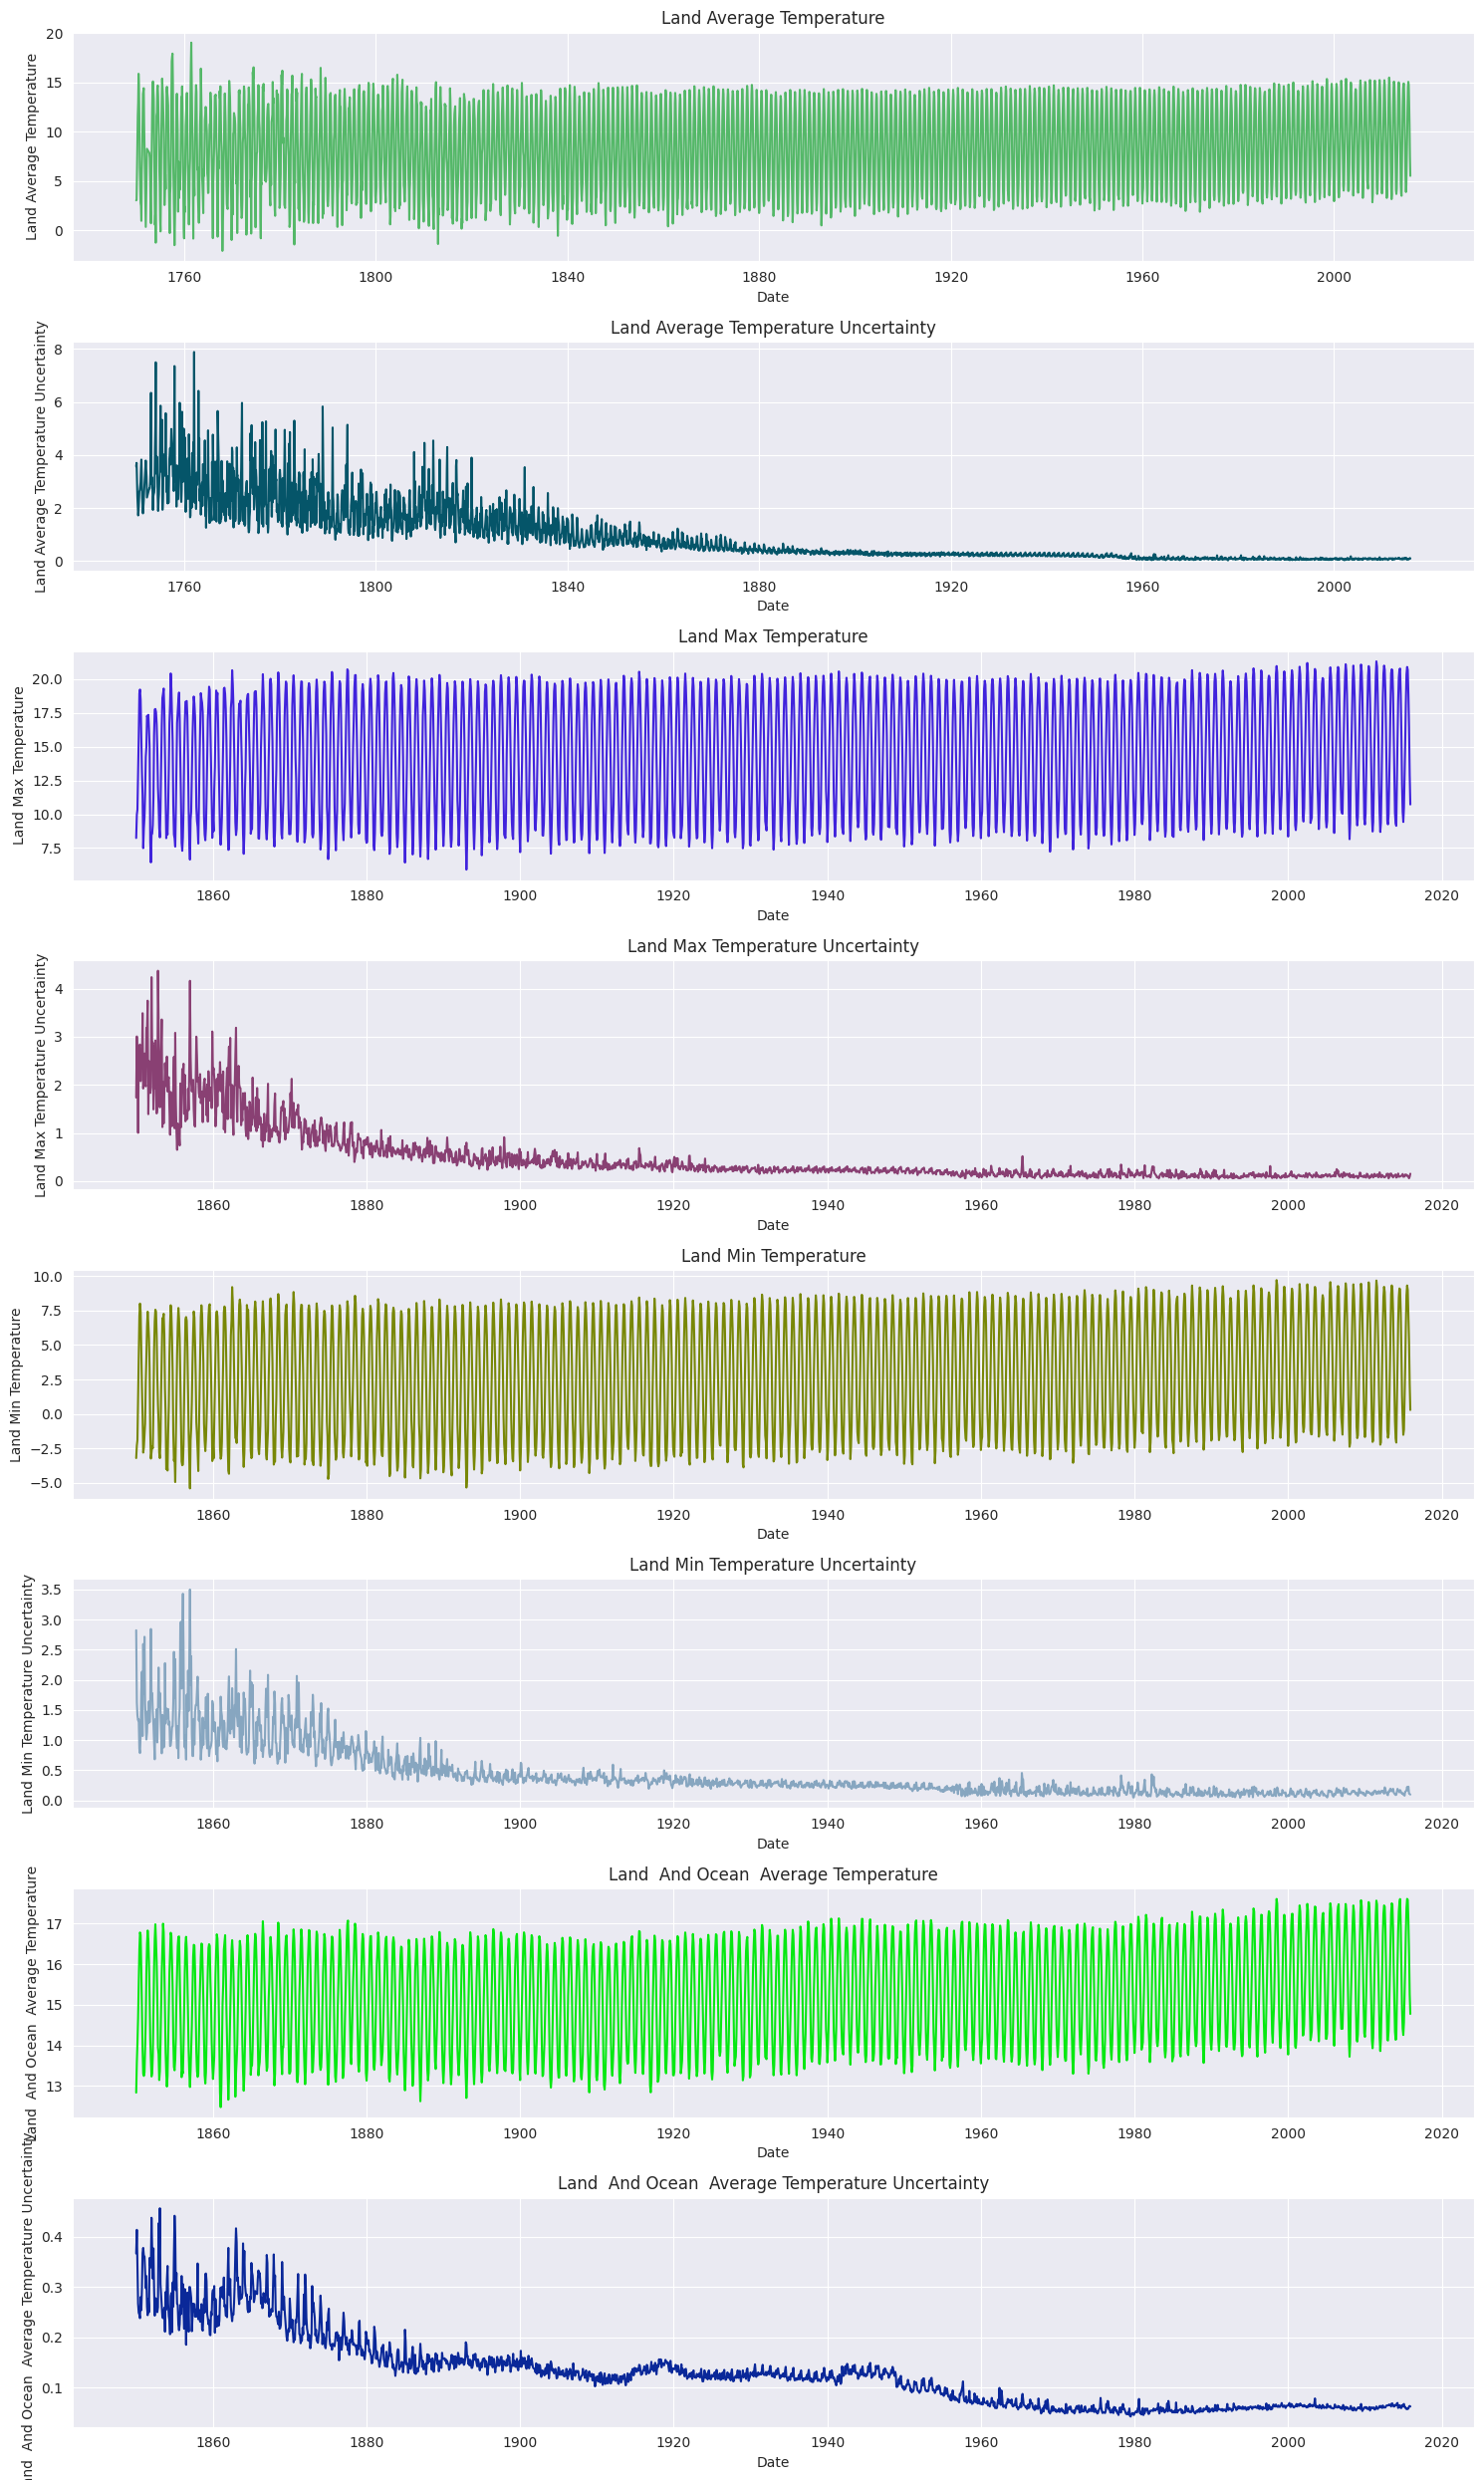

In [ ]:
# Making some basic vizualisations to see some trendings of any temperature types with respect to time/date
sns.set_style('darkgrid')
sns.set_palette('deep')
fig, axes = plt.subplots(len(gl_temp_df.drop('Date', axis=1).columns), 1, figsize=(15, 25))
plt.title('Global Temperatures')

# Let's generate the colors to be used as the legend as we run our program
def color_generator(number_of_colors_needed):
  colors = set()
  for num in range(number_of_colors_needed):
    color = '#{:02x}{:02x}{:02x}'.format(randrange(256), randrange(256), randrange(256))
    colors.add(color)
  return colors
our_colors = color_generator(len(gl_temp_df.drop('Date', axis=1).columns))

# The plot of our visualizations
for ax, col, our_color in zip(axes, gl_temp_df.drop('Date', axis=1).columns, our_colors):
    sns.lineplot(data=gl_temp_df, x='Date', y=col, ax=ax, color=our_color)
    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()

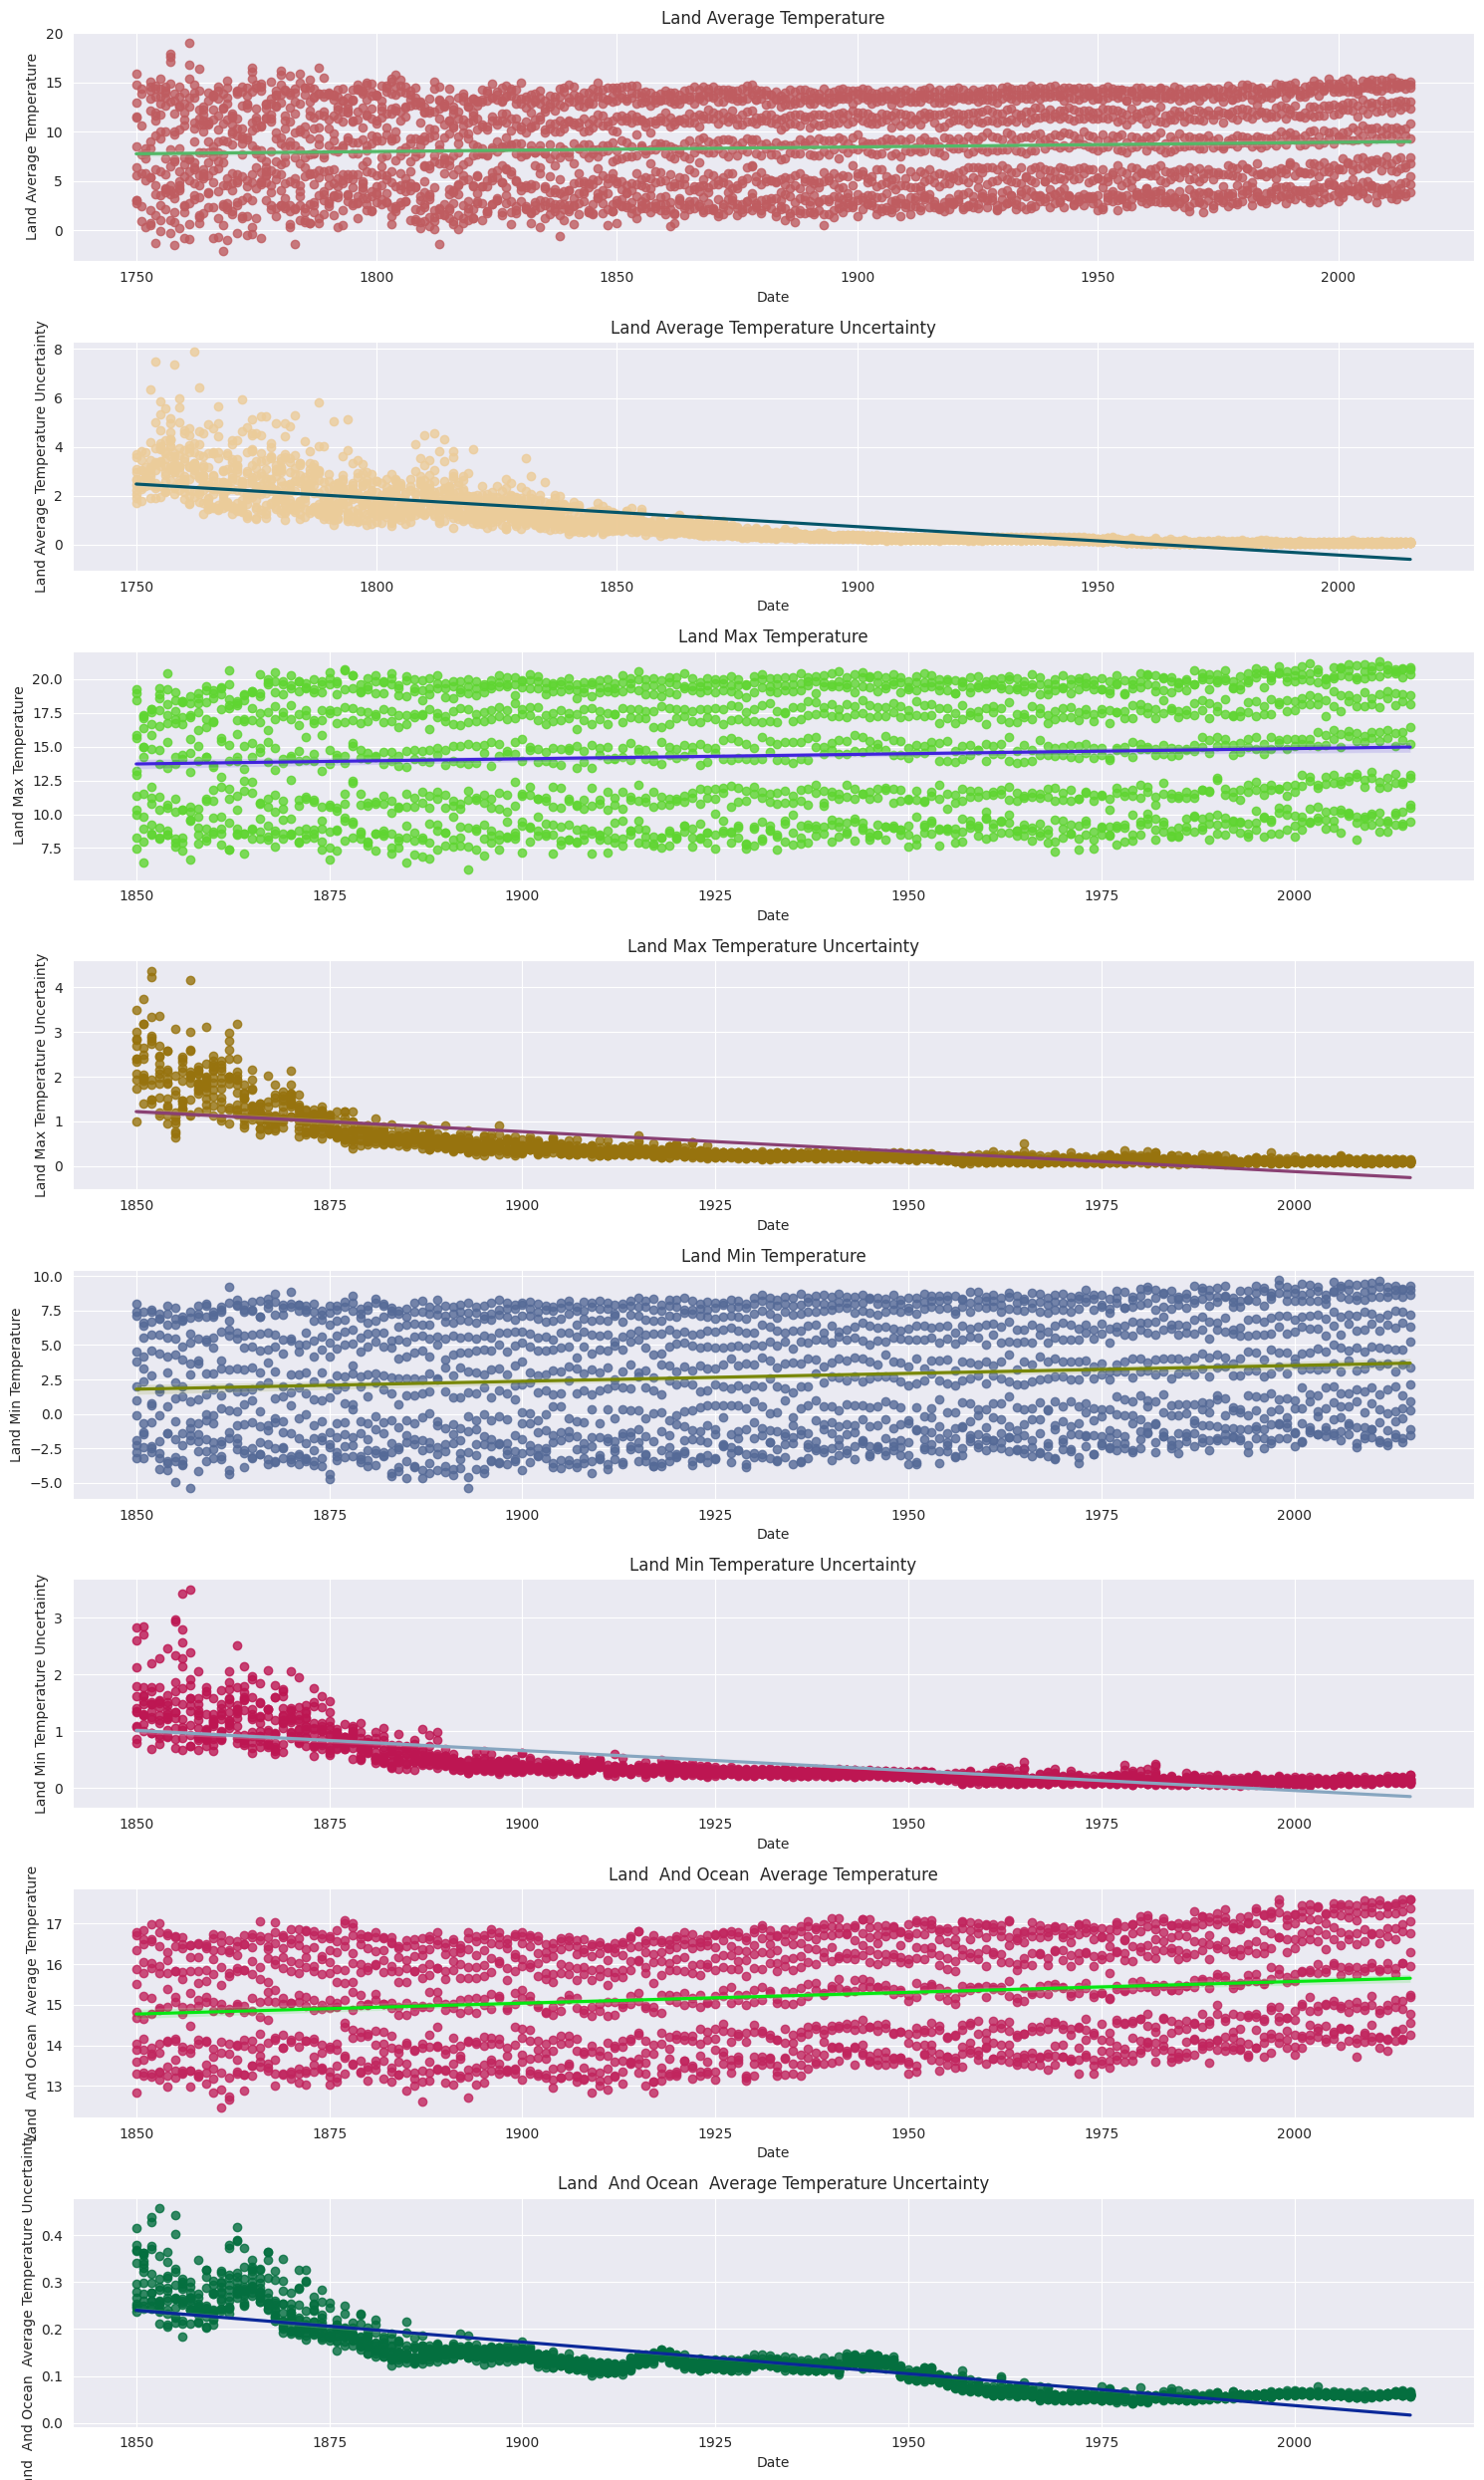

In [ ]:
new_gl_temp_df = gl_temp_df.copy()
new_gl_temp_df['Date']  = new_gl_temp_df['Date'].dt.year
fig, axes = plt.subplots(len(new_gl_temp_df.drop('Date', axis=1).columns), 1, figsize=(15, 25))
plt.title('Trending/Regression Lines In Global Temperatures', fontsize=16)

# The plot of our visualizations
for ax, col, scatter_color, line_color in zip(axes, new_gl_temp_df.drop('Date', axis=1).columns, hex_colors, our_colors):
    sns.regplot(
        data=new_gl_temp_df,
        x='Date',
        y=col,
        scatter_kws={'color': scatter_color},
        line_kws={'color': line_color},
        ax=ax
    )
    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()